# Import Necessary Libraries

In [242]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset and Check the shape of the dataset¶

In [243]:
# Load the data from the CSV file
data = pd.read_csv('Bookings.csv')

print(data.shape)
shape = data.shape
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


(525, 6)

Number of rows : 525

Number of columns : 6


In [244]:

# Look at first 5 rows of the data
data.head()

,Unnamed: 0,Hotel_Name,Review,Total_Review,Rating,Location
0,0,Oakwood Residence Midtown East,Superb,28,9.1,Murray Hill
1,1,Murray Hill East Suites,Good,52,7.6,Murray Hill
2,2,The Herald 8 by LuxUrban,Good,"2,870",7.8,Manhattan
3,3,"The Cloud One New York-Downtown, by the Motel ...",Very good,975,8.3,Wall Street - Financial District
4,4,Pod Times Square,Very good,"13,951",8.1,Hell's Kitchen


In [245]:
# Look at last 5 rows of the data
data.tail()

,Unnamed: 0,Hotel_Name,Review,Total_Review,Rating,Location
520,520,Fantastic 3BR At Financial District,NaN,NaN,NaN,Wall Street - Financial District
521,521,3 Bedroom Apartment In Midtown East,NaN,NaN,NaN,Manhattan
522,522,2BD 1BA Apartment At Financial District,NaN,NaN,NaN,Wall Street - Financial District
523,523,2BD 1BA Apartment At Wall Street,NaN,NaN,NaN,Wall Street - Financial District
524,524,Two BD Apartment At Midtown East,NaN,NaN,NaN,Manhattan


In [246]:
data.columns

Index(['Unnamed: 0', 'Hotel_Name', 'Review', 'Total_Review', 'Rating',
       'Location'],
      dtype='object')

In [247]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [248]:
data.columns

Index(['Hotel_Name', 'Review', 'Total_Review', 'Rating', 'Location'], dtype='object')

In [249]:
data.dtypes

Hotel_Name       object
Review           object
Total_Review     object
Rating          float64
Location         object
dtype: object

In [250]:
 #remove comma  
data["Total_Review"] = data["Total_Review"].replace(",", "", regex=True) 
data 

data['Total_Review'] = data['Total_Review'].str.extract('(\d+)')

# Convert the 'Total_Review' string to float
data['Total_Review']= data['Total_Review'].astype(float)

In [251]:
data.dtypes

Hotel_Name       object
Review           object
Total_Review    float64
Rating          float64
Location         object
dtype: object

In [252]:
data.isna().sum()

Hotel_Name        0
Review          200
Total_Review    200
Rating          210
Location          0
dtype: int64

Dataset has missing values in the 'Review', 'Total_Review', and 'Rating' columns.

In [253]:
# Fill missing values in the 'Review', 'Total_Review', and 'Rating' columns with the mean of each column
data['Total_Review'].fillna(data['Total_Review'].mean(), inplace=True)
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [254]:
data['Review'] = data['Review'].fillna('No review')

In [255]:
data.isna().sum()

Hotel_Name      0
Review          0
Total_Review    0
Rating          0
Location        0
dtype: int64

In [256]:
data.shape

(525, 5)

In [257]:
data.tail()

,Hotel_Name,Review,Total_Review,Rating,Location
520,Fantastic 3BR At Financial District,No review,1771.630769,7.883492,Wall Street - Financial District
521,3 Bedroom Apartment In Midtown East,No review,1771.630769,7.883492,Manhattan
522,2BD 1BA Apartment At Financial District,No review,1771.630769,7.883492,Wall Street - Financial District
523,2BD 1BA Apartment At Wall Street,No review,1771.630769,7.883492,Wall Street - Financial District
524,Two BD Apartment At Midtown East,No review,1771.630769,7.883492,Manhattan


In [258]:
data.Review

0         Superb 
1           Good 
2           Good 
3      Very good 
4      Very good 
          ...    
520     No review
521     No review
522     No review
523     No review
524     No review
Name: Review, Length: 525, dtype: object

# EDA 

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

In [259]:

# the describe method will get the summary statistics for the numerical columns ..
data.describe()

,Total_Review,Rating
count,525.000000,525.000000
mean,1771.630769,7.883492
std,1989.434764,0.685223
min,1.000000,1.000000
25%,664.000000,7.883492
50%,1771.630769,7.883492
75%,1771.630769,8.100000
max,16148.000000,10.000000


In [260]:
top_rated = data.sort_values('Rating', ascending=False).head(10)
print(top_rated[['Hotel_Name', 'Rating']])

                                            Hotel_Name  Rating
143                   Thompson Central Park - New York    10.0
271  FiDi Studio w Residents Bar Golf Simulator Gym...    10.0
319                                       Hotel Beacon    10.0
327                                  Chelsea Townhouse     9.7
292                                   Casamia 36 Hotel     9.5
314                                      Smyth Tribeca     9.4
240  EVEN Hotel New York Times Square South, an IHG...     9.3
297             Baccarat Hotel and Residences New York     9.3
239                 Entire Apartment near Central Park     9.2
207       Casablanca Hotel by Library Hotel Collection     9.2


In [261]:
bottom_rated = data.sort_values('Rating').head(10)
print(bottom_rated[['Hotel_Name', 'Rating']])

                                            Hotel_Name  Rating
331                                Crosby Street Hotel     1.0
270                                          The Plaza     3.8
304                 Le Méridien New York, Fifth Avenue     5.3
150  Hilton Garden Inn New York Manhattan Midtown East     5.6
233       SoHo 2BR w WD Balcony nr Whole Foods NYC-892     5.6
35                     The New Yorker, A Wyndham Hotel     5.6
11                       The Manhattan at Times Square     5.6
230                                      ASIATEL HOTEL     5.7
55   Residence Inn by Marriott New York Manhattan/T...     5.9
219           Equinox Hotel Hudson Yards New York City     6.0


In [262]:
review_counts = data['Review'].value_counts()
print(review_counts)

No review         200
Very good         117
Good              116
Review score       31
Fabulous           30
Superb             16
Superb 9.0          8
Exceptional         5
Exceptional 10      2
Name: Review, dtype: int64


Text(0.5, 1.0, 'Distribution of Ratings')

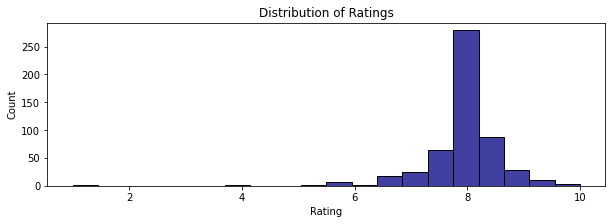

In [263]:
sns.histplot(data = data
            ,x ='Rating'
            ,color = 'navy'
             ,bins=20
            )
plt.title('Distribution of Ratings')

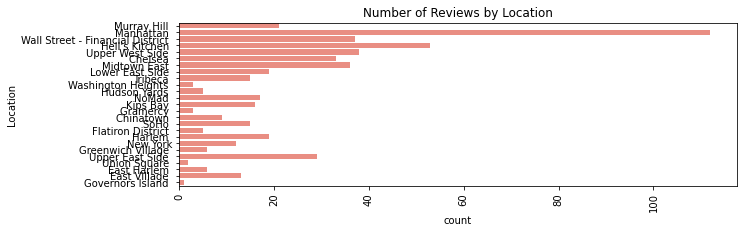

In [264]:
sns.countplot(data=data,y ='Location',color='salmon')
plt.xticks(rotation=90)
plt.title('Number of Reviews by Location')
# Show the plot
plt.show() 